ipython nbconvert seaborn_overview.ipynb --to slides --post serve

<center>
  <header>
    <h3>Seaborn: Statistical Data Visualization</h3>
  </header>
  <img src="./images/seaborn_example_gallery_top.png" width="100%">
<br>
claus.aichinger@gmail.com
</center>

# What is it?
> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

# How?
```
seaborn/requirements.txt:

        numpy
        scipy
        matplotlib
        pandas
        statsmodels
        patsy
```

# Why use it?
- Style functions

- Color palettes

- Distribution plots

- Regression plots

- Categorical plots

- Axis grid objects

> "Those are nice plots" - Hadley Wickham

In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('darkgrid')
pd.options.display.max_rows = 7
warnings.filterwarnings('ignore')
rc('font', size=20)

# Example: Categorical Plot

In [314]:
# Wage dataset from https://cran.r-project.org/web/packages/ISLR/
df = pd.read_csv('./data/wage.csv.gz', index_col=0)
df.head(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [315]:
df['sex'].unique()  # <-- not a very inclusive data set ;)

array(['1. Male'], dtype=object)

## Goal:
Explore how **wage** depends on **education** and **race** by using boxplots.

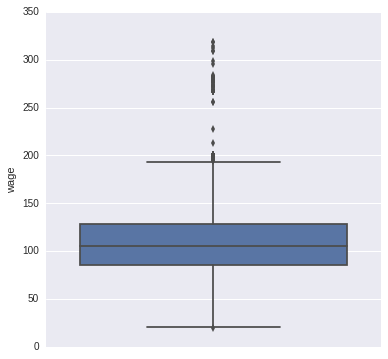

In [300]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(y='wage', data=df)

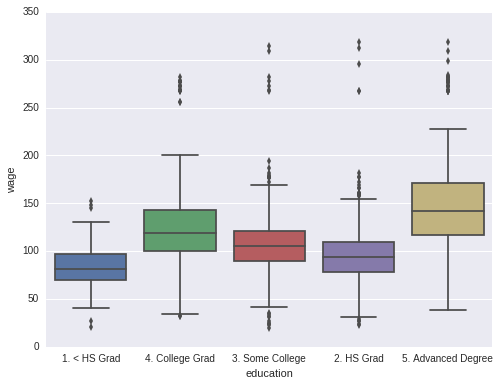

In [301]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y='wage', x='education', data=df, ax=ax)

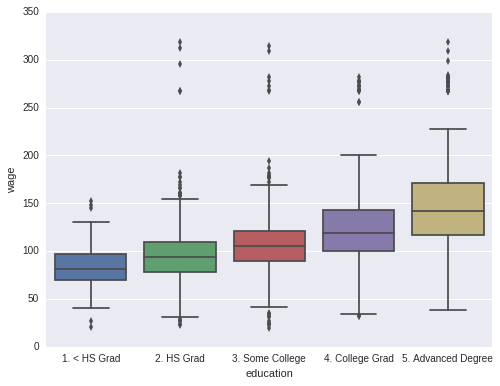

In [302]:
order = sorted(df['education'].unique(), key=lambda x: int(x[0]))
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y='wage', x='education', data=df, 
            order=order, ax=ax)

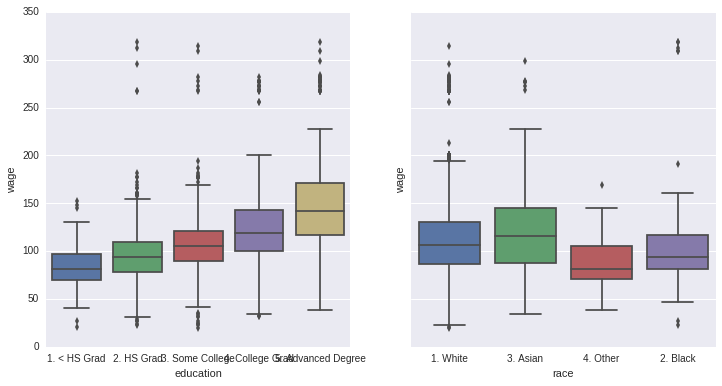

In [303]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
sns.boxplot(y='wage', x='education', data=df, 
            order=order, ax=axs[0])
sns.boxplot(y='wage', x='race', data=df, ax=axs[1])

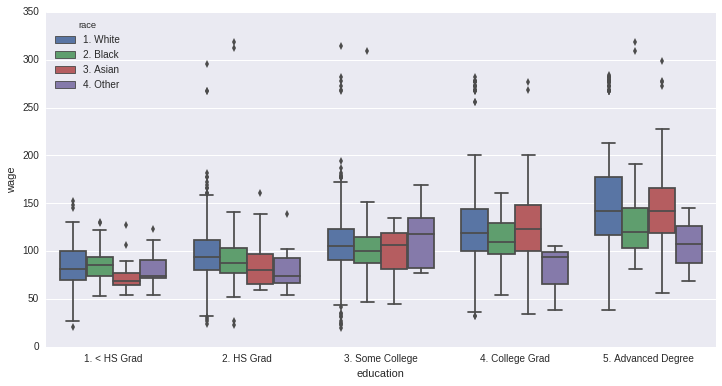

In [304]:
hue_order = sorted(df['race'].unique(), key=lambda x: int(x[0]))
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=order, hue_order=hue_order, ax=ax)

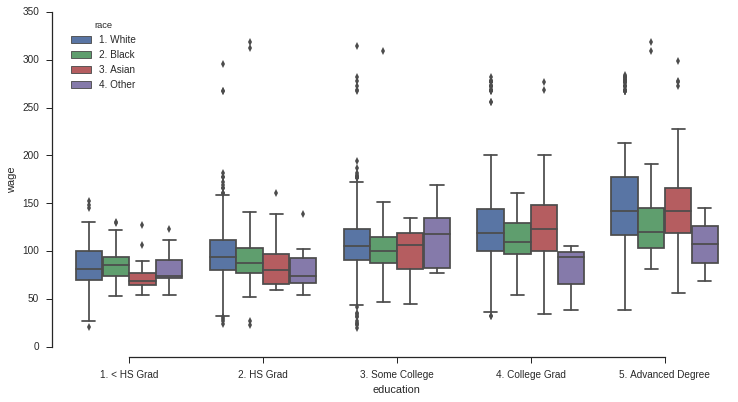

In [305]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(y='wage', x='education', hue='race', data=df, 
            order=order, hue_order=hue_order, ax=ax)
sns.despine(offset=10, trim=True)

# Example: Time Series Plot
Data borrowed from European Air Quality Database
http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8

Nitrogen dioxide (air), μg/m3

In [306]:
df = pd.read_csv('./data/no2.csv.gz', index_col=0, parse_dates=True)
df

,no2
1988-01-01 00:00:00,0.00
1988-01-01 01:00:00,48.80
1988-01-01 02:00:00,66.00
...,...
2012-12-31 21:00:00,74.46
2012-12-31 22:00:00,66.60
2012-12-31 23:00:00,60.85


In [307]:
#fig, ax = plt.subplots(figsize=(12, 5))
#df.plot(ax=ax)
sns.set_style('darkgrid')

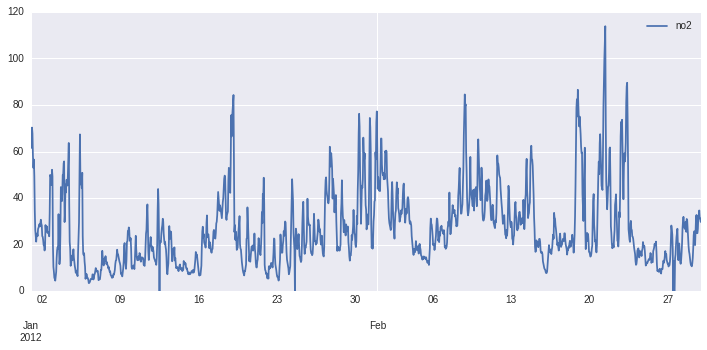

In [308]:
df = df.loc['2012':'2013']  # <-- partial string indexing
fig, ax = plt.subplots(figsize=(12, 5))
df.loc['2012-01':'2012-02'].plot(ax=ax)

# Goal:
We know that interal combustion engines burning fossil fuels are a prominent source of NO2.


Therefore we:

- explore how NO2 varies during the day,
- check if there is there a difference between working days and weekends.

In [309]:
df['is_weekend'] = df.index.dayofweek > 4  # The day of the week with Monday=0, Sunday=6
df['hour'] = df.index.hour
df['unit'] = df.index.dayofyear  # <-- for aggregation purposes

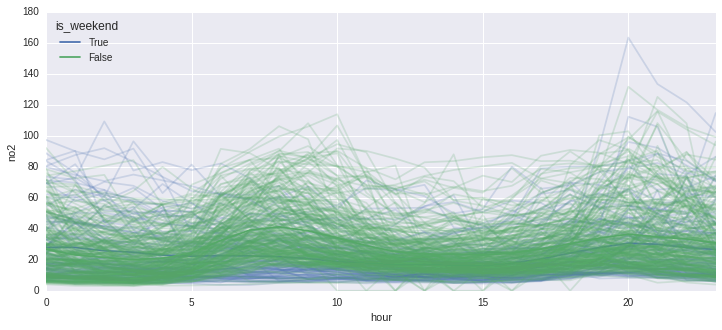

In [310]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.tsplot(value='no2', time='hour', unit='unit', condition='is_weekend', data=df, 
           err_style='unit_traces', ax=ax)

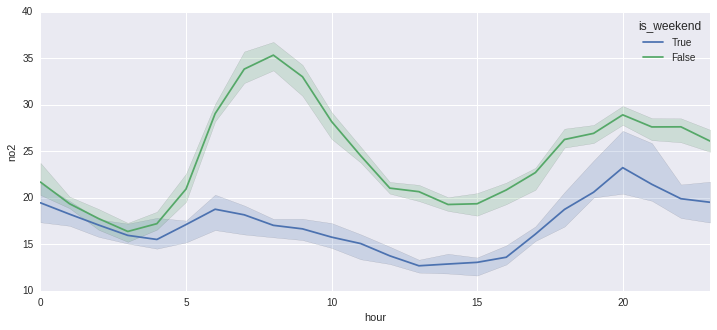

In [311]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.tsplot(value='no2', time='hour', unit='unit', condition='is_weekend', data=df, 
           estimator=np.median, err_style='ci_band', ax=ax)

<center>
  <header>
    <h3>Thanks for watching Kung Fu with matplotlib and pandas!</h3>
  </header>
  <img src="./images/kung_fu_mpl_pd.png" width="100%">
<br>
<br>
https://github.com/mwaskom/seaborn/
<br>
http://stanford.edu/~mwaskom/software/seaborn/examples/index.html
</center>